In [1]:
import torch.nn as torch
import numpy as np
import pandas as pd


In [ ]:
from pandas import merge

# Merging data frames

### Defining a Function

In [3]:
import pandas as pd
from IPython.core.pylabtools import figsize


returns = [20,1,5,6,8,9,78,4,6,55]
days = [1,2,3,4,5,6,7,8,9,10]
avg = sum(returns)/len(returns)
returns = pd.Series(returns)  # convert to Pandas Series

def z_score(x):
    mean = returns.mean()
    std = returns.std()
    z_score = (returns - mean) / std
    return z_score

print(z_score(returns))

0    0.030775
1   -0.700138
2   -0.546262
3   -0.507792
4   -0.430854
5   -0.392385
6    2.261985
7   -0.584731
8   -0.507792
9    1.377195
dtype: float64


### Matplotlib

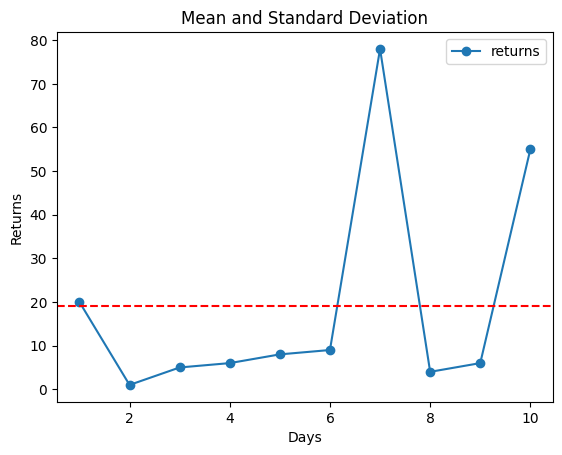

In [22]:
import matplotlib.pyplot as plt
plt.plot(days,returns,marker='o',label='returns')
plt.title("Mean and Standard Deviation")
plt.xlabel("Days")
plt.ylabel("Returns")
plt.axhline(y=avg,color='r',linestyle='--')
plt.legend()
plt.show()

### Video 4 - Time Series (Array>Vector>Time Series)
* Basic Statistics
* Tme Series Fundamentals
* Fundamental Trading Dynamics

### Statistics
* Central Tendency 

In [23]:
# Mean is sensitive to outliers.
import numpy as np

trade_pnl = [10.0,11.0,9.0,-400.0,2.0,10.0,11.0,11.0,8.0,10.0,10.2]
np.mean(trade_pnl)

np.float64(-27.981818181818184)

In [5]:
# Median  - Middle Number which is not sensitive to outliers.
np.median(trade_pnl)

np.float64(10.0)

### Spread / Dispersion
* Standard Deviation

In [6]:
portfolio_a = [1.0,1.0,-1.0,1.0,-2.0,1.0,2.0,1.0]
np.sum(portfolio_a)

np.float64(4.0)

In [7]:
# mean
np.mean(portfolio_a)

np.float64(0.5)

In [8]:
# std
np.std(portfolio_a)

np.float64(1.224744871391589)

In [9]:
portfolio_b = [10.0,10.0,-10.0,10.0,-56.0,10.0,20.0,10.0]
np.sum(portfolio_b)

np.float64(4.0)

In [10]:
np.std(portfolio_b)
# as we can see that the spread is more volatile due to the higher values.

np.float64(22.73213584333861)

### Risk Adjusted Returns

In [11]:
# Create df
pd.DataFrame({'portfolio_a':portfolio_a,'portfolio_b':portfolio_b})

,portfolio_a,portfolio_b
0,1.0,10.0
1,1.0,10.0
2,-1.0,-10.0
3,1.0,10.0
4,-2.0,-56.0
5,1.0,10.0
6,2.0,20.0
7,1.0,10.0


In [12]:
import polars as pl

df = pl.DataFrame({"portfolio_a":portfolio_a,"portfolio_b":portfolio_b})
df

portfolio_a,portfolio_b
f64,f64
1.0,10.0
1.0,10.0
-1.0,-10.0
1.0,10.0
-2.0,-56.0
1.0,10.0
2.0,20.0
1.0,10.0


In [13]:
benchmark = pd.DataFrame([
    ['a',np.sum(portfolio_a),np.mean(portfolio_a),np.std(portfolio_a)],
    ['b',np.sum(portfolio_b),np.mean(portfolio_b),np.std(portfolio_b)]
    ], columns = ['portfolio','total_pnl','mean_pnl','std_pnl'])

benchmark

,portfolio,total_pnl,mean_pnl,std_pnl
0,a,4.0,0.5,1.224745
1,b,4.0,0.5,22.732136


In [14]:
benchmark['sharpe'] = benchmark['mean_pnl']/benchmark['std_pnl']
benchmark

,portfolio,total_pnl,mean_pnl,std_pnl,sharpe
0,a,4.0,0.5,1.224745,0.408248
1,b,4.0,0.5,22.732136,0.021995


### Correlation
* Positive or Negative

In [15]:
 x = [1,2,3,4]
 y = [1,3,2,5]
 np.corrcoef(x,y)[0,1]

np.float64(0.8315218406202999)

In [16]:
# Negative Corr
x = [1,2,3,4]
y = [-1,-3,-2,-5]
np.corrcoef(x,y)[0,1]

np.float64(-0.8315218406202999)

### Time Series

In [9]:
import yfinance as yf
data = yf.download("AAPL", start="2024-01-01", end="2025-12-31", interval="1h")
data.to_csv("AAPL_1h.csv")
appl=data
appl.info()

C:\Users\Amin\AppData\Local\Temp\ipykernel_18340\59070791.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2024-01-01", end="2025-12-31", interval="1h")
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3299 entries, 2024-01-02 14:30:00+00:00 to 2025-11-19 17:30:00+00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3299 non-null   float64
 1   (High, AAPL)    3299 non-null   float64
 2   (Low, AAPL)     3299 non-null   float64
 3   (Open, AAPL)    3299 non-null   float64
 4   (Volume, AAPL)  3299 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 154.6 KB


<Axes: title={'center': 'AAPL'}, xlabel='Datetime'>

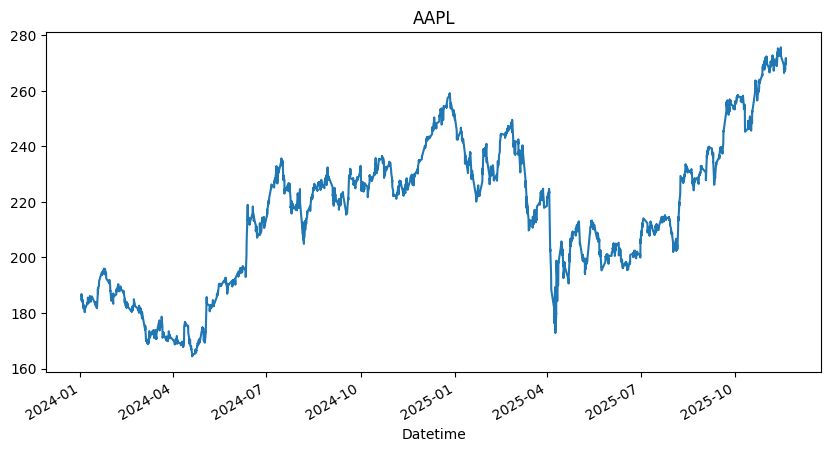

In [10]:
appl['Close', 'AAPL'].plot(title='AAPL',figsize=(10,5))

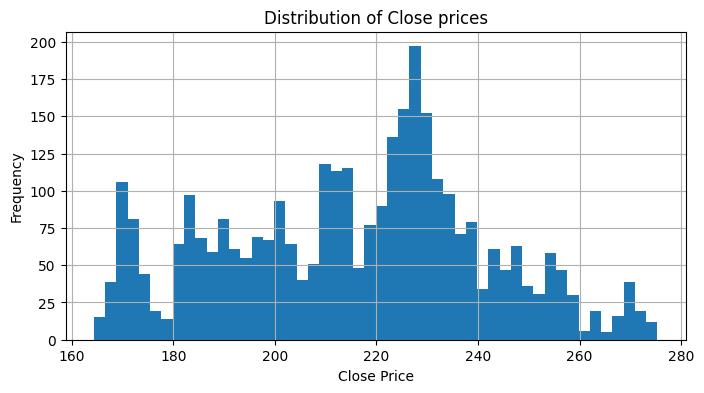

In [29]:
# Plot the histogram of the close column

appl['Close','AAPL'].hist(bins=50,figsize=(8,4))
plt.title('Distribution of Close prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

In [30]:
appl['Close','AAPL'].mean()
appl['Close','AAPL'].std() # this is why you analyze returns or differences in Econometrics

np.float64(25.5906471119313)

In [19]:
# Differencing / returns

appl['close_delta'] = appl['Close','AAPL'] - appl['Close','AAPL'].shift() # this is the px movement from t to t-1
appl


Price,Close,High,Low,Open,Volume,close_delta,close_delta_lag_1,close_delta_lag_2,close_delta_lag_3,close_delta_lag_4
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Datetime,,,,,,,,,,
2024-01-02 14:30:00+00:00,186.189896,188.440002,186.009995,187.800995,21173291,NaN,NaN,NaN,NaN,NaN
2024-01-02 15:30:00+00:00,186.804993,186.904999,185.184296,186.179993,9010595,0.615097,NaN,NaN,NaN,NaN
2024-01-02 16:30:00+00:00,186.615005,187.350006,186.570007,186.800003,6143754,-0.189987,0.615097,NaN,NaN,NaN
2024-01-02 17:30:00+00:00,185.294998,187.039993,185.259995,186.615005,5381701,-1.320007,-0.189987,0.615097,NaN,NaN
2024-01-02 18:30:00+00:00,184.494995,185.539993,184.229996,185.289993,7228643,-0.800003,-1.320007,-0.189987,0.615097,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-11-18 20:30:00+00:00,267.510010,268.429993,267.329987,268.299988,3127789,-0.770203,0.245728,-0.415527,1.285004,-0.674988
2025-11-19 14:30:00+00:00,271.850006,272.209991,265.500000,265.524994,6778562,4.339996,-0.770203,0.245728,-0.415527,1.285004


NameError: name 'plt' is not defined

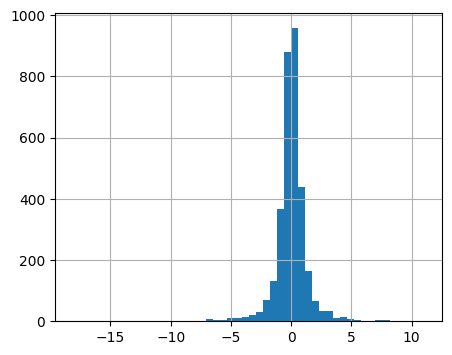

In [21]:
# distribution of the close delta / difference

appl['close_delta'].hist(bins=50,figsize=(5,4))
plt.show

In [22]:
# Now we can compute the mean and std on the close delta.
appl['close_delta'].mean()

np.float64(0.025513976902727505)

In [23]:
appl['close_delta'].std()

np.float64(1.4059989747003552)

### Stationary vs Non-Stationary
* Statistical properties of the time series does not change. This is not exactly the case.

C:\Users\Amin\AppData\Local\Temp\ipykernel_18340\930451130.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yearly_stats  = appl['close_delta'].resample('M').agg(['mean','std']) # keep in mind for doing seasonal analysis. Can do a monthly vs yearly agg.


<Axes: xlabel='Datetime'>

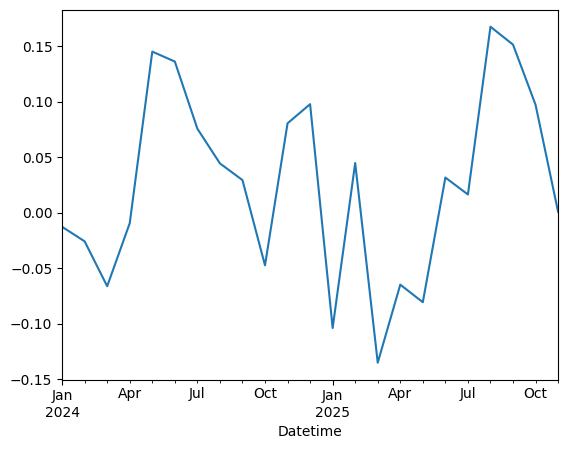

In [25]:
# Easy yearly resampling using the resample and agg function for each year.
yearly_stats  = appl['close_delta'].resample('M').agg(['mean','std']) # keep in mind for doing seasonal analysis. Can do a monthly vs yearly agg.
yearly_stats['mean'].plot()

### Lags
* Common in econometrics and time series analysis is forecasting the future values in the time series from the previous known time series.
* We use this by taking the lags

In [28]:
# lags
appl['close_delta_lag_1'] = appl['close_delta'].shift()
appl['close_delta_lag_2'] = appl['close_delta'].shift(2)
appl['close_delta_lag_3'] = appl['close_delta'].shift(3)
appl['close_delta_lag_4'] = appl['close_delta'].shift(4)




In [130]:
appl[['close_delta','close_delta_lag_1','close_delta_lag_2','close_delta_lag_3','close_delta_lag_4']]
# Drop NAs
appl[['close_delta','close_delta_lag_1','close_delta_lag_2','close_delta_lag_3','close_delta_lag_4']].dropna()

Price,close_delta,close_delta_lag_1,close_delta_lag_2,close_delta_lag_3,close_delta_lag_4
Ticker,,,,,
Datetime,,,,,
2024-01-02 19:30:00+00:00,-0.074997,-0.800003,-1.320007,-0.189987,0.615097
2024-01-02 20:30:00+00:00,1.104996,-0.074997,-0.800003,-1.320007,-0.189987
2024-01-03 14:30:00+00:00,-1.566299,1.104996,-0.074997,-0.800003,-1.320007
2024-01-03 15:30:00+00:00,0.241302,-1.566299,1.104996,-0.074997,-0.800003
2024-01-03 16:30:00+00:00,-0.270004,0.241302,-1.566299,1.104996,-0.074997
...,...,...,...,...,...
2025-11-11 16:30:00+00:00,0.815002,-1.600006,4.740021,0.241394,-0.541412
2025-11-11 17:30:00+00:00,1.165009,0.815002,-1.600006,4.740021,0.241394


### Serial Correlation
* Looking at the correlation in the time series
* Analyze the correlation going back through the lags

In [131]:
appl[['close_delta','close_delta_lag_1','close_delta_lag_2','close_delta_lag_3','close_delta_lag_4']].dropna().corr()

,Price,close_delta,close_delta_lag_1,close_delta_lag_2,close_delta_lag_3,close_delta_lag_4
,Ticker,,,,,
Price,Ticker,,,,,
close_delta,,1.000000,0.012334,-0.024227,0.015060,0.001258
close_delta_lag_1,,0.012334,1.000000,0.012504,-0.024202,0.014981
close_delta_lag_2,,-0.024227,0.012504,1.000000,0.012561,-0.024306
close_delta_lag_3,,0.015060,-0.024202,0.012561,1.000000,0.012399
close_delta_lag_4,,0.001258,0.014981,-0.024306,0.012399,1.000000


### Auto-Regression
* First-Order Model or AR(1)

In [132]:
ts = pd.DataFrame({'log_return':[-0.1,0.2,-0.2,0.1,-0.3,0.3]})

# number of rows
n = len(ts)

# Create date index ending today
dates = pd.date_range(end=pd.Timestamp.today().normalize(),periods=n, freq='D')

# Assign the date inex
ts.index = dates

ts

,log_return
2025-11-07,-0.1
2025-11-08,0.2
2025-11-09,-0.2
2025-11-10,0.1
2025-11-11,-0.3
2025-11-12,0.3


In [134]:
# creating lag 1

ts['log_return_lag_1'] = ts['log_return'].shift()
ts

,log_return,log_return_lag_1
2025-11-07,-0.1,NaN
2025-11-08,0.2,-0.1
2025-11-09,-0.2,0.2
2025-11-10,0.1,-0.2
2025-11-11,-0.3,0.1
2025-11-12,0.3,-0.3


### AR(1) Model Definition
* Powerful but simplistic Econometric

In [135]:
y = ts['log_return']
y_lag_1 = ts['log_return_lag_1']

weight = 0.0
bias = 0.0

y = weight * y_lag_1 + bias

### Fundamental Trasding Dynamics
* Mean Reversion
* Momentum

In [137]:
# Mean Reversion
# this is mathematical optimization to find the optimal weights and bias

weight = -0.5  # if the weight is negative then it exhibits mean reversion behavior. Weight interperets trading dynamic
bias = 0.0001
ts['y_hat'] = weight * ts['log_return_lag_1'] + bias # We denote the prediction as y_hat

ts

,log_return,log_return_lag_1,y_hat
2025-11-07,-0.1,NaN,NaN
2025-11-08,0.2,-0.1,0.0501
2025-11-09,-0.2,0.2,-0.0999
2025-11-10,0.1,-0.2,0.1001
2025-11-11,-0.3,0.1,-0.0499
2025-11-12,0.3,-0.3,0.1501


In [138]:
# Momentum

ts = pd.DataFrame({'log_return':[0.1,0.2,0.3,0.4,-0.1,-0.2,-0.3,-0.4]})

# number of rows
n = len(ts)

# Create date index ending today
dates = pd.date_range(end=pd.Timestamp.today().normalize(),periods=n, freq='D')

# Assign the date inex
ts.index = dates
ts['log_return_lag_1'] = ts['log_return'].shift()
ts
ts

# if you look at the log return you will identify the momentum or mean reversion in the series.

,log_return,log_return_lag_1
2025-11-05,0.1,NaN
2025-11-06,0.2,0.1
2025-11-07,0.3,0.2
2025-11-08,0.4,0.3
2025-11-09,-0.1,0.4
2025-11-10,-0.2,-0.1
2025-11-11,-0.3,-0.2
2025-11-12,-0.4,-0.3


In [139]:
weight = 0.5  # if the weight is positive then it exhibits momentum behavior. Weight interperets trading dynamic
bias = 0.0001
ts['y_hat'] = weight * ts['log_return_lag_1'] + bias # We denote the prediction as y_hat

ts

,log_return,log_return_lag_1,y_hat
2025-11-05,0.1,NaN,NaN
2025-11-06,0.2,0.1,0.0501
2025-11-07,0.3,0.2,0.1001
2025-11-08,0.4,0.3,0.1501
2025-11-09,-0.1,0.4,0.2001
2025-11-10,-0.2,-0.1,-0.0499
2025-11-11,-0.3,-0.2,-0.0999
2025-11-12,-0.4,-0.3,-0.1499


### Matrices 2 dimensional Arrays

### Statistical Edge

* array=vector=time series=matrices=multi-variate time series=forecasting

* model = statistical edge
* strategy = execution of the statistical edge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

### Matrix Algebra

* What is a matrix? It is a two dimensional array

In [2]:
matrix = [[1,2,3,],[4,5,6,],[7,8,9,]]

In [3]:
matrix[0]

[1, 2, 3]

In [5]:
matrix[0][2]

3

### Matrix scaler algebra

In [6]:
# matrix +1

no_row = len(matrix)
no_cols = len(matrix[0])

m = no_row
n = no_cols

for i in range(m):
    for j in range(n):
        matrix[i][j] +=1

matrix

[[2, 3, 4], [5, 6, 7], [8, 9, 10]]

In [8]:
# now represent as a numpy array

A = np.array([[1,2,3,],[4,5,6,],[7,8,9,]])

A


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [9]:
A +1

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [10]:
 1 + A

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [11]:
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

### Matrix Vector Algebra

this is essential working behind the model

X * w = y_hat

In [14]:
X = np.array([[-0.1,-0.2], [-0.2,-0.4],[-0.4,-0.8]])

In [15]:
X

array([[-0.1, -0.2],
       [-0.2, -0.4],
       [-0.4, -0.8]])

In [18]:
# imagine this as weights so for lags weight 1 and weight 2 for the lag 1 and 2
w = np.array ([-0.5,-0.1])

In [17]:
# matrix multiplication with a vector

np.dot(X,w)

array([0.07, 0.14, 0.28])

In [19]:
# Then ther eis a bias
bias = 0.0001
b = bias

In [21]:
# so this is taking the weights and adding the bias.
# this bias can skew it positive or negative depending on the weight value
np.dot(X,w) + b

array([0.0701, 0.1401, 0.2801])

### broadcasting != matrix Multiplication



In [22]:
X * w

array([[0.05, 0.02],
       [0.1 , 0.04],
       [0.2 , 0.08]])

In [23]:
# The way it is done is in numpy by doing
np.dot(X,w)

array([0.07, 0.14, 0.28])

### How to develop a statistical edge using Machine Learning

### Statistical == Good Forecast


### Step 1: Download OHLC perp data

In [62]:
import yfinance as yf
data = yf.download("AAPL", start="2024-01-01", end="2025-12-31", interval="1h")
data.to_csv("AAPL_1h.csv")
appl=data
appl.columns

C:\Users\Amin\AppData\Local\Temp\ipykernel_28916\3288524689.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2024-01-01", end="2025-12-31", interval="1h")
[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

C:\Users\Amin\AppData\Local\Temp\ipykernel_28916\2848953396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl['close_log_return'] = np.log(appl['Close', 'AAPL']/appl['Close', 'AAPL'].shift())


<Axes: xlabel='Datetime'>

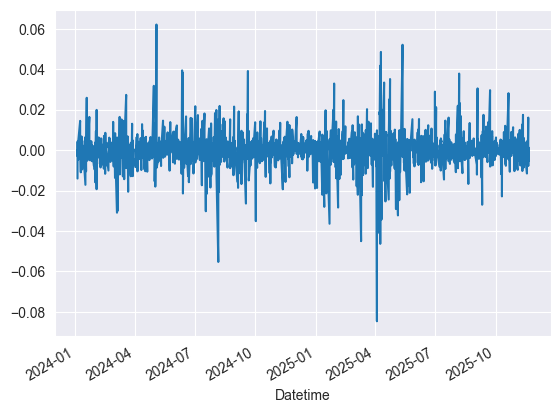

In [131]:
# create log return

appl['close_log_return'] = np.log(appl['Close', 'AAPL']/appl['Close', 'AAPL'].shift())
appl["close_log_return"].plot()


### Create the AR Model using lag features

In [132]:
# lags
appl['close_log_return_lag1'] = appl["close_log_return"].shift()
appl['close_log_return_lag2'] = appl["close_log_return"].shift(2)
appl["close_log_return_lag3"] = appl["close_log_return"].shift(3)

appl = appl.dropna()
appl[["close_log_return","close_log_return_lag1","close_log_return_lag2","close_log_return_lag3"]]
appl

C:\Users\Amin\AppData\Local\Temp\ipykernel_28916\3182143411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl['close_log_return_lag1'] = appl["close_log_return"].shift()
C:\Users\Amin\AppData\Local\Temp\ipykernel_28916\3182143411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl['close_log_return_lag2'] = appl["close_log_return"].shift(2)
C:\Users\Amin\AppData\Local\Temp\ipykernel_28916\3182143411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Price,Close,High,Low,Open,Volume,close_log_return,close_log_return_lag1,close_log_return_lag2,close_log_return_lag3
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Datetime,,,,,,,,,
2024-01-04 17:30:00+00:00,182.914993,182.990005,181.960007,182.130005,4961844,0.004246,0.000082,0.002446,-0.014047
2024-01-04 18:30:00+00:00,182.500000,183.070007,182.419998,182.910004,4172442,-0.002271,0.004246,0.000082,0.002446
2024-01-04 19:30:00+00:00,181.940094,182.660004,181.872101,182.500000,6011068,-0.003073,-0.002271,0.004246,0.000082
2024-01-04 20:30:00+00:00,181.919998,182.414993,181.429993,181.945007,7594098,-0.000110,-0.003073,-0.002271,0.004246
2024-01-05 14:30:00+00:00,182.070007,182.759995,181.520004,181.990005,13194900,0.000824,-0.000110,-0.003073,-0.002271
...,...,...,...,...,...,...,...,...,...
2025-11-19 16:30:00+00:00,270.399994,270.654999,269.529999,269.750000,2001030,0.002481,-0.007829,0.016093,-0.002875
2025-11-19 17:30:00+00:00,270.029999,271.309998,269.619995,270.459991,2049762,-0.001369,0.002481,-0.007829,0.016093


In [133]:
appl[["close_log_return","close_log_return_lag1","close_log_return_lag2","close_log_return_lag3"]].corr()

,Price,close_log_return,close_log_return_lag1,close_log_return_lag2,close_log_return_lag3
,Ticker,,,,
Price,Ticker,,,,
close_log_return,,1.000000,0.011699,-0.023338,0.012056
close_log_return_lag1,,0.011699,1.000000,0.011747,-0.023376
close_log_return_lag2,,-0.023338,0.011747,1.000000,0.011524
close_log_return_lag3,,0.012056,-0.023376,0.011524,1.000000


### Inspect the data

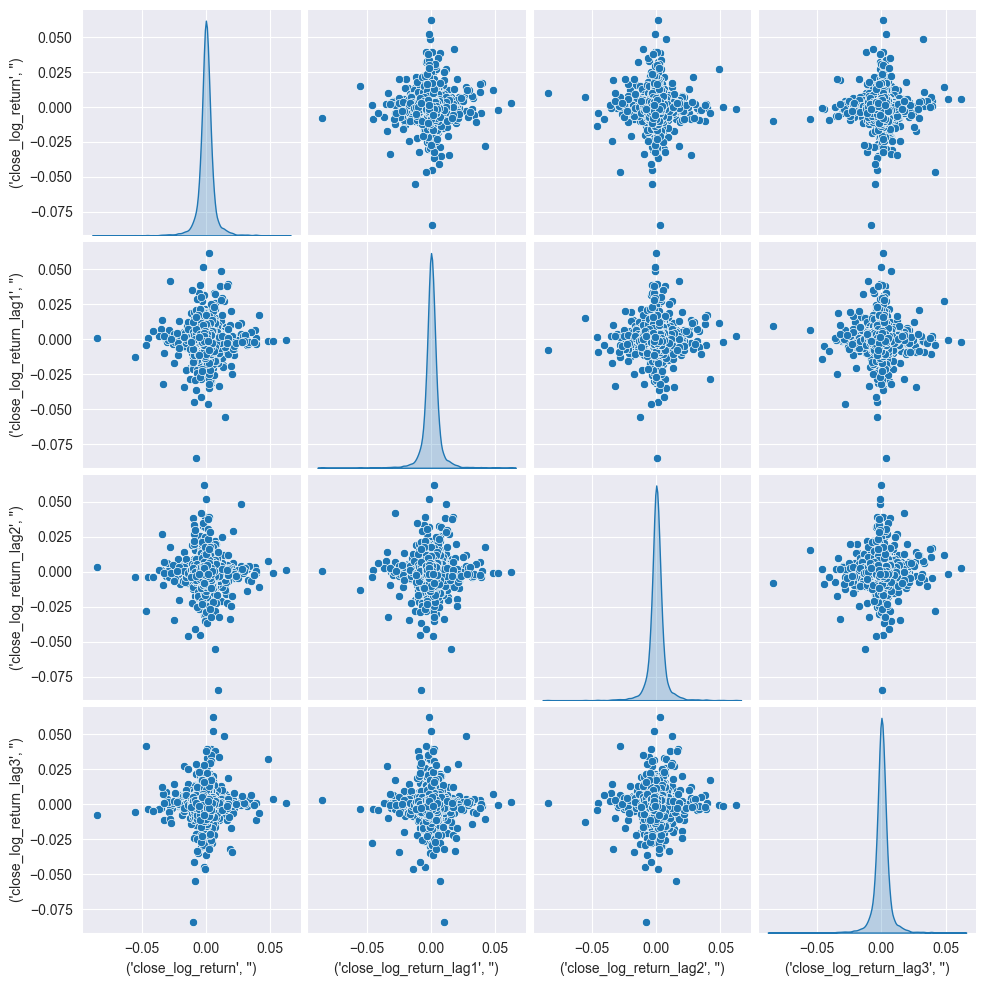

In [134]:
sns.pairplot(appl[["close_log_return", "close_log_return_lag1", "close_log_return_lag2","close_log_return_lag3"]],diag_kind="kde")

In [136]:
X = appl[['close_log_return_lag1',"close_log_return_lag2","close_log_return_lag3"]].dropna().values

In [77]:
X

array([[0.02823997, 0.02829111, 0.02836679],
       [0.02828946, 0.02823997, 0.02829111],
       [0.02823472, 0.02828946, 0.02823997],
       ...,
       [0.02070463, 0.02076114, 0.02059011],
       [0.02072806, 0.02070463, 0.02076114],
       [0.02076075, 0.02072806, 0.02070463]], shape=(3289, 3))

In [137]:
X.shape

(3285, 3)

In [138]:
y = appl['close_log_return'].dropna().values

In [81]:
y.shape

(3289,)

### Forecasting: Regression

### Split Training/Testing Data
* Very important to keep temporal order of the time series

In [139]:
# Split by time

def time_split(x,train_size = 0.75):
    i = int(len(x)*train_size)
    return x[:i],x[i:].copy()

appl_train, appl_test = time_split(appl)

In [140]:
appl_train

Price,Close,High,Low,Open,Volume,close_log_return,close_log_return_lag1,close_log_return_lag2,close_log_return_lag3
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Datetime,,,,,,,,,
2024-01-04 17:30:00+00:00,182.914993,182.990005,181.960007,182.130005,4961844,0.004246,0.000082,0.002446,-0.014047
2024-01-04 18:30:00+00:00,182.500000,183.070007,182.419998,182.910004,4172442,-0.002271,0.004246,0.000082,0.002446
2024-01-04 19:30:00+00:00,181.940094,182.660004,181.872101,182.500000,6011068,-0.003073,-0.002271,0.004246,0.000082
2024-01-04 20:30:00+00:00,181.919998,182.414993,181.429993,181.945007,7594098,-0.000110,-0.003073,-0.002271,0.004246
2024-01-05 14:30:00+00:00,182.070007,182.759995,181.520004,181.990005,13194900,0.000824,-0.000110,-0.003073,-0.002271
...,...,...,...,...,...,...,...,...,...
2025-06-03 15:30:00+00:00,203.054993,203.339996,202.059998,202.520004,4217975,0.002737,0.003760,-0.000297,0.000694
2025-06-03 16:30:00+00:00,203.314606,203.740005,202.720001,203.059998,3820571,0.001278,0.002737,0.003760,-0.000297


In [141]:
appl_test

Price,Close,High,Low,Open,Volume,close_log_return,close_log_return_lag1,close_log_return_lag2,close_log_return_lag3
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Datetime,,,,,,,,,
2025-06-04 13:30:00+00:00,205.139999,206.240005,202.650803,202.910004,12614073,0.008813,0.000787,0.000435,-0.001097
2025-06-04 14:30:00+00:00,204.089996,205.179993,203.990097,205.119995,4439145,-0.005132,0.008813,0.000787,0.000435
2025-06-04 15:30:00+00:00,202.830002,204.600006,202.149994,204.089996,7130175,-0.006193,-0.005132,0.008813,0.000787
2025-06-04 16:30:00+00:00,203.414993,203.589996,202.615005,202.820007,2639222,0.002880,-0.006193,-0.005132,0.008813
2025-06-04 17:30:00+00:00,203.119995,203.470001,202.850006,203.412003,2609590,-0.001451,0.002880,-0.006193,-0.005132
...,...,...,...,...,...,...,...,...,...
2025-11-19 16:30:00+00:00,270.399994,270.654999,269.529999,269.750000,2001030,0.002481,-0.007829,0.016093,-0.002875
2025-11-19 17:30:00+00:00,270.029999,271.309998,269.619995,270.459991,2049762,-0.001369,0.002481,-0.007829,0.016093


### Train Model

In [142]:
# important to get reproducibility

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import os

# -------------------------------------------------------
# 0. REPRODUCIBILITY SETTINGS
# -------------------------------------------------------
SEED = 99

# Ensure Python’s hash-based operations are deterministic
os.environ["PYTHONHASHSEED"] = str(SEED)

# Set seeds for Python's built-in RNG, NumPy, and PyTorch
random.seed(SEED)
np.random.seed(SEED)

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)          # For single-GPU setups
torch.cuda.manual_seed_all(SEED)      # For multi-GPU setups


# -------------------------------------------------------
# 1. CREATE TENSORS FROM DATAFRAME **AFTER SETTING SEEDS**
# -------------------------------------------------------

# Input features (model predictors)
features = ['close_log_return_lag1']

# Target variable (model output)
target = 'close_log_return'

# Convert train/test splits into PyTorch tensors
X_train = torch.tensor(appl_train[features].values, dtype=torch.float32)
X_test  = torch.tensor(appl_test[features].values, dtype=torch.float32)

# Create target tensors and add a column dimension (N → N×1)
y_train = torch.tensor(appl_train[target].values, dtype=torch.float32).unsqueeze(1)
y_test  = torch.tensor(appl_test[target].values, dtype=torch.float32).unsqueeze(1)


# -------------------------------------------------------
# 2. DEFINE MODEL
# -------------------------------------------------------

# Number of input features (1 in this case)
no_features = len(features)

# Simple linear regression model: y = W*x + b
model = nn.Linear(no_features, 1)

# Huber loss (robust to outliers compared to MSE)
criterion = nn.HuberLoss()

# Stochastic Gradient Descent optimizer - essentially how to optimize the model
optimizer = optim.SGD(model.parameters(), lr=0.01) # this is called a hyperparameter lr


# -------------------------------------------------------
# 3. TRAINING LOOP (FULL-BATCH GRADIENT DESCENT) Which means all the data is in memory. so all the batches are done at the same time.

# below is the training loop and the bones of the full model
# -------------------------------------------------------
for epoch in range(5000):

    # Clear previously stored gradients (they accumulate by default). Which is the prcess of learning
    optimizer.zero_grad()

    # Forward pass: compute predictions this will make a prediction for evry row.
    y_pred = model(X_train)

    # Compute loss between predictions and true values
    loss = criterion(y_pred, y_train)

    # Backpropagation: compute gradients of loss w.r.t. parameters
    loss.backward()

    # Update model parameters using the computed gradients
    optimizer.step()

    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print("Epoch:", epoch, "Loss:", loss.item())


# -------------------------------------------------------
# 4. CHECK TRAINED PARAMETERS
# -------------------------------------------------------
print("Final weight:", model.weight.data)
print("Final bias:", model.bias.data)

# as you see the loss gets smaller at each epoch. It will be wise to have a cutoff point when the model has trained to a specific point to avoid over fitting.

Epoch: 0 Loss: 0.4420587718486786
Epoch: 500 Loss: 6.006915646139532e-05
Epoch: 1000 Loss: 4.09791391575709e-05
Epoch: 1500 Loss: 4.096995326108299e-05
Epoch: 2000 Loss: 4.0961593185784295e-05
Epoch: 2500 Loss: 4.0953236748464406e-05
Epoch: 3000 Loss: 4.094488758710213e-05
Epoch: 3500 Loss: 4.093653478776105e-05
Epoch: 4000 Loss: 4.092818562639877e-05
Epoch: 4500 Loss: 4.0919836465036497e-05
Final weight: tensor([[-0.7913]])
Final bias: tensor([7.9854e-05])


In [143]:
# if we want to reuse this into the future for production.
# helps that once we load up system we load the model.

torch.save(model.state_dict(), "model.pth")

# Evaluate the model - Out of sample

In [145]:
# We see below it is in tensor format
y_hat

tensor([[-5.4308e-04],
        [-6.8944e-03],
        [ 4.1407e-03],
        [ 4.9805e-03],
        [-2.1992e-03],
        [ 1.2283e-03],
        [-1.9284e-04],
        [ 1.2608e-03],
        [ 1.7862e-03],
        [-8.0624e-03],
        [ 5.5296e-03],
        [ 2.1859e-03],
        [ 1.6034e-03],
        [ 5.8947e-03],
        [ 7.8976e-04],
        [-1.2098e-02],
        [ 1.9475e-03],
        [ 2.2440e-03],
        [-3.6799e-03],
        [-5.3240e-03],
        [ 1.1809e-03],
        [ 3.0622e-03],
        [-5.2957e-03],
        [ 3.1306e-03],
        [ 2.4094e-03],
        [ 1.2631e-02],
        [-2.8323e-03],
        [ 9.0520e-04],
        [-6.6691e-04],
        [-5.5179e-03],
        [-1.6541e-03],
        [ 3.1068e-03],
        [ 3.1286e-03],
        [ 3.1521e-04],
        [-4.3022e-03],
        [ 3.5305e-04],
        [ 4.0429e-05],
        [ 7.2155e-03],
        [ 2.9714e-03],
        [-2.6936e-03],
        [ 6.6883e-03],
        [ 1.1100e-03],
        [ 5.9699e-04],
        [ 3

In [146]:
# detatch
y_hat.detach().shape

torch.Size([822, 1])

In [147]:
# We need to now create it back into a numpy array . so reverse the unsqueeze

y_hat.detach().squeeze()

tensor([-5.4308e-04, -6.8944e-03,  4.1407e-03,  4.9805e-03, -2.1992e-03,
         1.2283e-03, -1.9284e-04,  1.2608e-03,  1.7862e-03, -8.0624e-03,
         5.5296e-03,  2.1859e-03,  1.6034e-03,  5.8947e-03,  7.8976e-04,
        -1.2098e-02,  1.9475e-03,  2.2440e-03, -3.6799e-03, -5.3240e-03,
         1.1809e-03,  3.0622e-03, -5.2957e-03,  3.1306e-03,  2.4094e-03,
         1.2631e-02, -2.8323e-03,  9.0520e-04, -6.6691e-04, -5.5179e-03,
        -1.6541e-03,  3.1068e-03,  3.1286e-03,  3.1521e-04, -4.3022e-03,
         3.5305e-04,  4.0429e-05,  7.2155e-03,  2.9714e-03, -2.6936e-03,
         6.6883e-03,  1.1100e-03,  5.9699e-04,  3.2033e-03, -2.5288e-04,
        -1.6754e-03, -2.5855e-03,  2.1078e-03, -4.5746e-04, -1.1725e-03,
         1.2270e-02, -5.3678e-03,  1.0420e-03,  7.9854e-05,  4.0693e-03,
         3.1372e-04, -8.4716e-04, -7.8561e-03,  4.5390e-03,  1.0229e-03,
        -3.1059e-03, -3.7470e-04, -9.4390e-04, -4.1896e-04,  3.2376e-03,
         7.9854e-05, -6.0329e-05,  4.4769e-03,  4.3

In [148]:
# As we can see it has gone from two dimensional to one dimensional
y_hat.detach().squeeze().shape

torch.Size([822])

In [149]:
# Add it into our test df

appl_test["y_hat"] = y_hat.detach().squeeze()
appl[["close_log_return","y_hat"]]

KeyError: "['y_hat'] not in index"

In [125]:
# 1. Ensure prediction is on X_test and converted to numpy (for stability)
y_hat = model(X_test).detach().squeeze().numpy()

# 2. Assign the column to the test DataFrame
appl_test["y_hat"] = y_hat

# 3. View the results using the test DataFrame!
appl_test[["close_log_return", "y_hat"]] # <-- Use appl_test here

Price,close_log_return,y_hat
Ticker,,
Datetime,,
2025-06-03 19:30:00+00:00,0.026158,0.025215
2025-06-04 13:30:00+00:00,0.026181,0.025221
2025-06-04 14:30:00+00:00,0.025926,0.025202
2025-06-04 15:30:00+00:00,0.026030,0.025410
2025-06-04 16:30:00+00:00,0.026205,0.025326
...,...,...
2025-11-19 16:30:00+00:00,0.020761,0.029763
2025-11-19 17:30:00+00:00,0.020705,0.029623


###  Add Directional Signal


In [150]:
appl_test['dir_signal'] = np.sign(appl_test["y_hat"])

In [151]:
appl_test[["close_log_return", "y_hat", "dir_signal"]]

Price,close_log_return,y_hat,dir_signal
Ticker,,,
Datetime,,,
2025-06-04 13:30:00+00:00,0.008813,-0.000543,-1.0
2025-06-04 14:30:00+00:00,-0.005132,-0.006894,-1.0
2025-06-04 15:30:00+00:00,-0.006193,0.004141,1.0
2025-06-04 16:30:00+00:00,0.002880,0.004981,1.0
2025-06-04 17:30:00+00:00,-0.001451,-0.002199,-1.0
...,...,...,...
2025-11-19 16:30:00+00:00,0.002481,0.006275,1.0
2025-11-19 17:30:00+00:00,-0.001369,-0.001883,-1.0


### Directional Accuracy (DA)

In [153]:
appl_test["is_won"] = appl_test["dir_signal"] == np.sign(appl_test[target])

appl_test[["close_log_return", "y_hat", "dir_signal", "is_won"]]

Price,close_log_return,y_hat,dir_signal,is_won
Ticker,,,,
Datetime,,,,
2025-06-04 13:30:00+00:00,0.008813,-0.000543,-1.0,False
2025-06-04 14:30:00+00:00,-0.005132,-0.006894,-1.0,True
2025-06-04 15:30:00+00:00,-0.006193,0.004141,1.0,False
2025-06-04 16:30:00+00:00,0.002880,0.004981,1.0,True
2025-06-04 17:30:00+00:00,-0.001451,-0.002199,-1.0,True
...,...,...,...,...
2025-11-19 16:30:00+00:00,0.002481,0.006275,1.0,True
2025-11-19 17:30:00+00:00,-0.001369,-0.001883,-1.0,True


In [155]:
da = appl_test["is_won"].mean()
da

np.float64(0.5206812652068127)

### Add Trade Returns


In [162]:
appl_test["trade_log_return"] = appl_test["dir_signal"] * appl_test[target]
appl_test["trade_log_return"]
appl_test["trade_log_return"].sum()


np.float64(0.13839744224297026)

### Evaluate Statistical Edge

In [160]:
# EV:

appl_test["trade_log_return"].mean()

np.float64(0.00016836671805714145)

In [163]:
np.exp(appl_test["trade_log_return"].sum())

np.float64(1.1484318949310697)

In [164]:
initial_capital = 100
np.exp(appl_test["trade_log_return"].sum()) * initial_capital

np.float64(114.84318949310696)

### Evaluate Equity Curve

In [165]:
cum_trade_log_returns = appl_test["trade_log_return"].cumsum()
cum_trade_log_returns

Datetime
2025-06-04 13:30:00+00:00   -0.008813
2025-06-04 14:30:00+00:00   -0.003682
2025-06-04 15:30:00+00:00   -0.009874
2025-06-04 16:30:00+00:00   -0.006994
2025-06-04 17:30:00+00:00   -0.005543
                               ...   
2025-11-19 16:30:00+00:00    0.131570
2025-11-19 17:30:00+00:00    0.132939
2025-11-19 18:30:00+00:00    0.131605
2025-11-19 19:30:00+00:00    0.132957
2025-11-19 20:30:00+00:00    0.138397
Name: trade_log_return, Length: 822, dtype: float64

<Axes: xlabel='Datetime'>

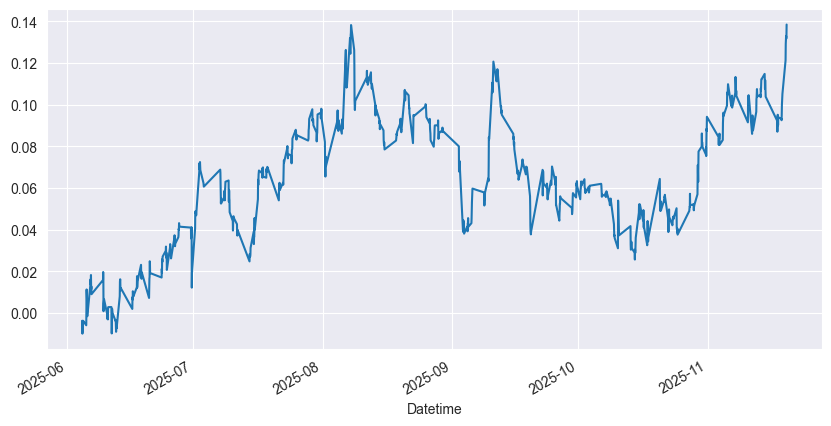

In [166]:
cum_trade_log_returns.plot(figsize=(10,5))

<Axes: xlabel='Datetime'>

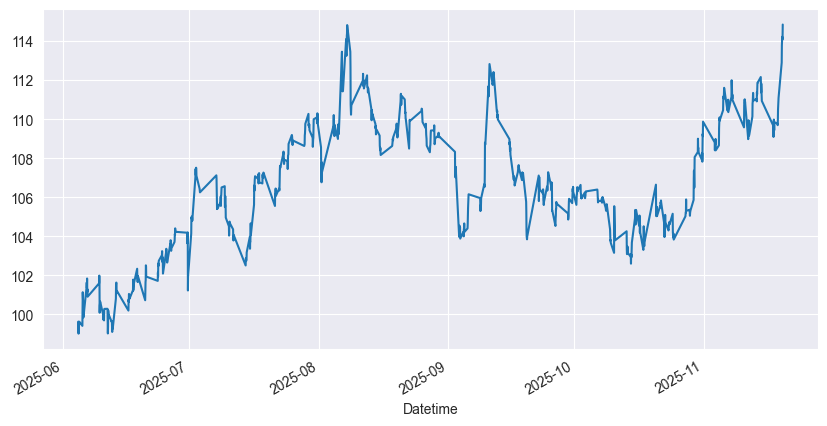

In [167]:
gross_equity_curve = np.exp(cum_trade_log_returns) * 100
gross_equity_curve.plot(figsize=(10,5))

### Sharpe Ratio. Risk adjusted Returns.

In [169]:
# This is per hour/bar
appl_test["trade_log_return"].mean()/appl_test["trade_log_return"].std()

np.float64(0.03177571124097012)

In [173]:
# annualize

no_trading_days_in_year = 365
no_hours_in_day = 24
t = no_trading_days_in_year * no_hours_in_day

appl_test["trade_log_return"].mean() / appl_test["trade_log_return"].std() * np.sqrt(t)

np.float64(2.974043615325261)

### Evaluate net returns (transacton fees)